# **Titanic Competition**

## **Informazioni**

**Informazioni Generali sul dataset**:

- `Survived` (`0`, `1`): Sopravvivenza (1 se la persona è sopravvissuta, 0 altrimenti);
- `Pclass` (`1`, `2`, `3`): Classe di alloggio (1°, 2° o 3° classe);
- `Sex` (`'male'`, `'female'`): Genere della persona;
- `Age`: Età (*in anni*) della persona;
- `SibSp`: Numero di fratelli oppure se sposa/marito a bordo;
- `Parch`: Numero di genitori e/o figli a bordo;
- `Ticket`: Numero identificativo del biglietto;
- `Fare`: Prezzo del biglietto;
- `Cabin`: Numero di cabina;
- `Embarked` (`C`, `Q`, `S`): Città di imbarco (Cherbourg, Queenstown, Southampton).

**Obiettivo**: Predirre se le persone elencate nel dataset di testing sono sopravvissute o meno.

## **Exploratory Data Analysis (EDA)**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [3]:
# importare dataset di training
train_df = pd.read_csv(filepath_or_buffer='train.csv')

# preview del dataset di training
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **Informazioni preliminari**

In [4]:
# vedere informazioni del dataset (tipo di variabili, presenza di valori nulli, ...)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Tramite il comando `.info()` è possibile osservare che il dataset è, tutto sommato, abbastanza pulito.

Abbiamo un totale di 891 osservazioni e sono presenti **valori nulli** solamente nelle colonne `Age`, `Cabin`, ed `Embarked` (*in quest'ultima solamente due valori*).

Tramite `.describe()` è possibile osservare i principali indici statistici di ogni variabile: **media**, **deviazione standard**, **minimo**, **massimo** e **percentili**. 

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


`.corr()` per vedere la **correlazione** tra le variabili

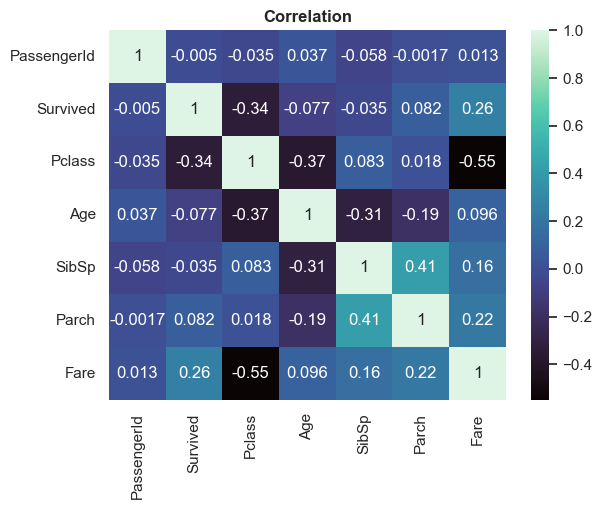

In [6]:
# correlazione
correlation = train_df.corr(numeric_only=True)

# grafico correlazione (heatmap)
heatmap = sns.heatmap(data=correlation, annot=True, cmap='mako').set_title('Correlation', weight='bold')

La correlazione mostra informazioni interessanti:
* La sopravvivenza (`'Survived'`) è particolarmente **correlata negativamente** con la variabile `'Pclass'` (*più alta è la classe di alloggio, minore è la probabilità di sopravvivenza*) e **positivamente** con la variabile `'Fare'` (*maggiore è il prezzo del biglietto, maggiore è la probabilità di sopravvivenza*)
* `'Pclass'` è **correlata negativamente** con `'Age'` (*inferiore è la classe, minore è l'età*) e con `'Fare'` (*inferiore è la classe, minore è il prezzo del biglietto*)
* `'SibSp'` è **correlata positivamente** con `'Parch'` (*se viaggi con fratelli/sorelle o moglie è probabile che viaggerai con i genitori e/o figli*) e `'Fare'` (*maggiore è il numero di parenti a bordo, più alto sarà il prezzo del biglietto*)

### **Variabile `'PassengerId'`**

La variabile **'PassengerId'** rappresenta semplicemente un indice di ordinazione dei passeggeri.

Non sembra esserci correlazione con altre variabili.

### **Variabile `'Pclass'`**

La variabile **'Pclass'** rappresenta la classe di alloggio del passeggero (1°, 2° o 3° classe, rispettivamente dalla migliore alla peggiore).

Questa variabile può essere fonte di diversi spunti per il nostro obiettivo.

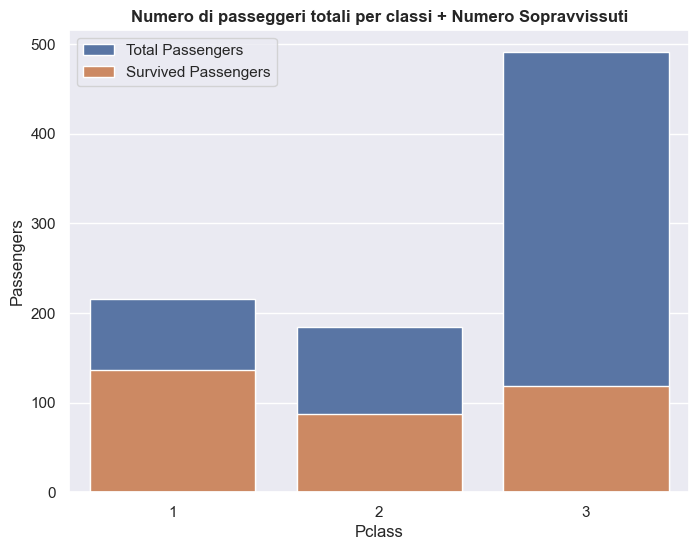

,Passengers,%_Passengers,Survived,%_Sopravvivenza,Età_media,Prezzo_medio
Pclass,,,,,,
1,216,0.242424,136,0.629630,38.233441,84.154687
2,184,0.206510,87,0.472826,29.877630,20.662183
3,491,0.551066,119,0.242363,25.140620,13.675550


In [26]:
# estrapolo colonna 'Pclass' dal dataset
pclass_train = train_df['Pclass']

# .value_counts() per identificare quanti valori appartengono a ciascuna classe
pclass_value_count = pclass_train.value_counts().sort_index()

# 'Pclass' groupby (sum)
pclass_sum_groupby = train_df.groupby(by=['Pclass']).sum(numeric_only=True)

# 'Pclass' groupby (mean)
pclass_mean_groupby = train_df.groupby(by=['Pclass']).mean(numeric_only=True)

# Trovare il numero di passengeri per classe
pclass_sum_groupby['Passengers'] = pclass_value_count

# Trovare la percentuale di sopravvivenza, età media e prezzo medio per classe
pclass_sum_groupby['%_Sopravvivenza'] = pclass_mean_groupby['Survived']
pclass_sum_groupby['Età_media'] = pclass_mean_groupby['Age']
pclass_sum_groupby['Prezzo_medio'] = pclass_mean_groupby['Fare']
pclass_sum_groupby['%_Passengers'] = [x / pclass_sum_groupby['Passengers'].sum() for x in pclass_sum_groupby['Passengers']]


# grafico per mostrare la distribuzione dei valori

# inizializzare figura
plt.figure(figsize=(8,6))

# barplot passeggeri totali
barplot_total = sns.barplot(data=pclass_sum_groupby, x=pclass_sum_groupby.index, y='Passengers', label='Total Passengers')

# barplot passeggeri sopravvissuti
barplot_survived = sns.barplot(data=pclass_sum_groupby, x=pclass_sum_groupby.index, y='Survived', label='Survived Passengers')

# titolo, legenda e .show()
plt.title('Numero di passeggeri totali per classi + Numero Sopravvissuti', weight='bold')
plt.legend()
plt.show()


print('\n==========================================================================\n')
display(pclass_sum_groupby[['Passengers', '%_Passengers', 'Survived', '%_Sopravvivenza', 'Età_media', 'Prezzo_medio']])

### **Variabile `'Name'`**

La variabile `'Name'`, presa a sé stante, non è importante per il nostro obiettivo.

Tuttavia, da essa è possibile estrapolare il **titolo** di ogni persona.

Esso può portare a spunti interessanti per l'analisi

In [28]:
# estrapolo titolo da variabile 'Name'

# primo split utilizzando la virgola
name_split_1 = [x.split(',')[1] for x in train_df['Name']]

# secondo split utilizzando il punto
name_split_2 = [x.split('.')[0] for x in name_split_1]

# elimino lo spazio iniziale
name_split_2_final = [x.replace(' ', '') for x in name_split_2]

# creo nuova colonna 'Name_title'
train_df['Name_title'] = name_split_2_final

# printing value_counts for each title
train_df['Name_title'].value_counts()

Name_title
Mr             517
Miss           182
Mrs            125
Master          40
Dr               7
Rev              6
Mlle             2
Major            2
Col              2
theCountess      1
Capt             1
Ms               1
Sir              1
Lady             1
Mme              1
Don              1
Jonkheer         1
Name: count, dtype: int64

In [36]:
train_df.groupby(by=['Name_title']).mean(numeric_only=True).iloc[:, 1:]

,Survived,Pclass,Age,SibSp,Parch,Fare
Name_title,,,,,,
Capt,0.000000,1.000000,70.000000,1.000000,1.000000,71.000000
Col,0.500000,1.000000,58.000000,0.000000,0.000000,31.025000
Don,0.000000,1.000000,40.000000,0.000000,0.000000,27.720800
Dr,0.428571,1.285714,42.000000,0.571429,0.000000,49.168457
Jonkheer,0.000000,1.000000,38.000000,0.000000,0.000000,0.000000
Lady,1.000000,1.000000,48.000000,1.000000,0.000000,39.600000
Major,0.500000,1.000000,48.500000,0.000000,0.000000,28.525000
Master,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125
Miss,0.697802,2.307692,21.773973,0.714286,0.549451,43.797873


In [44]:
train_df.groupby(by=['Pclass', 'Name_title']).sum(numeric_only=True).iloc[:, 1:]

Survived      Age  SibSp  Parch       Fare
Pclass Name_title                                             
1      Capt                0    70.00      1      1    71.0000
       Col                 1   116.00      0      0    62.0500
       Don                 0    40.00      0      0    27.7208
       Dr                  3   175.00      4      0   319.6792
       Jonkheer            0    38.00      0      0     0.0000
       Lady                1    48.00      1      0    39.6000
       Major               1    97.00      0      0    57.0500
       Master              3    15.92      2      6   353.4083
       Miss               44  1350.00     18     27  5722.5249
       Mlle                2    48.00      0      0   118.8042
       Mme                 1    24.00      0      0    69.3000
       Mr                 37  3617.50     30     27  7279.6792
       Mrs                41  1390.00     33     16  3913.1667
       Sir                 1    49.00      1      0    56.9292
       theCountess         1    33.00      0      0    86.5000
2      Dr                  0    77.00      0      0    24.5000
       Master              9    20.33      8     11   245.7542
       Miss               32   716.50      9     19   693.3875
       Mr                  8  2687.00     28     12  1751.9833
       Mrs                37  1381.00     28     27   963.3417
       Ms                  1    28.00      0      0    13.0000
       Rev                 0   259.00      1      1   109.8750
3      Master             11   128.42     82     38   788.9625
       Miss               51  1112.50    103     54  1555.3004
       Mr                 36  6578.00     91     40  3604.6240
       Mrs                21  1106.00     26     61   765.8082

### **Variabile `'Sex'`**

## **Machine Learning**